In [2]:
import pandas as pd
from sklearn import feature_selection
from feature_engine.encoding import OneHotEncoder
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
import seaborn
from sklearn import pipeline
from sklearn import cluster
import matplotlib.pyplot as plt

In [3]:
# Definição de Opções de Exibição do Pandas:

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)

In [4]:
# Carregamento de Dados
df = pd.read_csv("C:/Users/Mariana Moledo/Documents/GitHub/tcc_mba_cd/datasets/bd_alunos_evadidos.csv",sep=';', encoding='utf-8')
df.columns

Index(['Unnamed: 0', 'CODALUNO', 'ACAOAFIRMATIVA', 'ENEMLINGUAGEM',
       'ENEMHUMANAS', 'ENEMNATURAIS', 'ENEMMATEMATICA', 'ENEMREDACAO', 'CURSO',
       'CODTURNOINGRESSO', 'CODTURNOATUAL', 'TURNOATUAL', 'CR', 'DISCIPLINA',
       'NOTADISC', 'RESULTDISC', 'PERIODODISC', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'ANODESVINCULACAO', 'SEMESTREDESVINCULACAO',
       'IDADE', 'COR', 'BAIRRO', 'CEP', 'CIDADE', 'MOBILIDADE', 'CHCURSADA',
       'ESTADOCIVIL', 'TRANCAMENTOS', 'TEMPOPERMANENCIA', 'SEXO',
       'STATUSFORMACAO', 'NOME_CURSO', 'cep_destino', 'AREACURSO',
       'DISTANCIA_NUM'],
      dtype='object')

In [5]:
# Exclusão de Colunas

colunas_excluir = ['CODALUNO',
                   'STATUSFORMACAO',
                   'CR',
                   'CURSO',
                   'CODTURNOINGRESSO',
                   'CODTURNOATUAL',
                   'DISCIPLINA',
                   'NOTADISC',
                   'RESULTDISC',
                   'PERIODODISC',
                   'ANODESVINCULACAO',
                   'SEMESTREDESVINCULACAO',
                   'BAIRRO',
                   'CEP',
                   'CIDADE',
                   'CHCURSADA',
                   'TRANCAMENTOS',
                   'TEMPOPERMANENCIA',
                   'NOME_CURSO',
                   'cep_destino',
                   'MOBILIDADE',
                   'Unnamed: 0'
                   ]

In [6]:
df = df.drop(colunas_excluir, axis=1)

In [7]:
df.columns

Index(['ACAOAFIRMATIVA', 'ENEMLINGUAGEM', 'ENEMHUMANAS', 'ENEMNATURAIS',
       'ENEMMATEMATICA', 'ENEMREDACAO', 'TURNOATUAL', 'ANOINGRESSO',
       'SEMESTREINGRESSO', 'IDADE', 'COR', 'ESTADOCIVIL', 'SEXO', 'AREACURSO',
       'DISTANCIA_NUM'],
      dtype='object')

In [8]:
# Codificação One-Hot de Variáveis Categóricas
cat_features = ['ACAOAFIRMATIVA',
                'TURNOATUAL',
                'ANOINGRESSO',
                'SEMESTREINGRESSO',
                'COR',
                'ESTADOCIVIL',
                'SEXO',
                'AREACURSO']

df[cat_features] = df[cat_features].astype(str)

onehot = OneHotEncoder(variables=cat_features)
X_transform = onehot.fit_transform(df)

In [9]:
X_transform.shape

(9144, 41)

In [10]:
# Normalização Min-Max
# coloca todas as características numéricas no intervalo de 0 a 1
min_max = preprocessing.MinMaxScaler()
min_max.set_output(transform='pandas')


X_transform = min_max.fit_transform(X_transform)

X_transform

,ENEMLINGUAGEM,ENEMHUMANAS,ENEMNATURAIS,ENEMMATEMATICA,ENEMREDACAO,IDADE,DISTANCIA_NUM,ACAOAFIRMATIVA_AC,ACAOAFIRMATIVA_A1,ACAOAFIRMATIVA_L2,ACAOAFIRMATIVA_L1,ACAOAFIRMATIVA_L4,ACAOAFIRMATIVA_L3,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,TURNOATUAL_MATUTINO,TURNOATUAL_VESPERTINO,TURNOATUAL_nan,ANOINGRESSO_2012,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_BRANCA,COR_NÃO DECLARADO,COR_PARDA,COR_NEGRA,COR_INDÍGENA,COR_AMARELA,ESTADOCIVIL_SOLTEIRO,ESTADOCIVIL_CASADO,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas,AREACURSO_Ciências Humanas,AREACURSO_Ciências Biológicas e da Saúde,AREACURSO_Farmácia,AREACURSO_Ciências Exatas e da Terra,AREACURSO_Letras e Artes,AREACURSO_Engenharias,AREACURSO_Cinema e Audiovisual
0,0.561224,0.670017,0.617014,0.623363,0.822222,0.488372,0.003459,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.775656,0.737888,0.667534,0.657624,0.600000,0.418605,0.025636,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.725802,0.686957,0.690133,0.705332,0.622222,0.046512,0.043438,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.726968,0.627668,0.669546,0.599041,0.666667,0.093023,0.033672,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.780466,0.692716,0.680667,0.678087,0.444444,0.372093,0.002442,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,0.642566,0.630152,0.679602,0.597287,0.577778,0.069767,0.137335,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9140,0.622741,0.608696,0.518694,0.527479,0.422222,0.348837,0.004374,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9141,0.643732,0.825974,0.602579,0.411600,0.244444,0.837209,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9142,0.589796,0.677357,0.551585,0.528297,0.488889,0.046512,0.135300,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Seleção de Características por Variância:

var_feature_importance = feature_selection.VarianceThreshold(0.03)
var_feature_importance.set_output(transform='pandas')
X_transform_filter = var_feature_importance.fit_transform(X_transform)
X_transform_filter

,ACAOAFIRMATIVA_AC,ACAOAFIRMATIVA_A1,ACAOAFIRMATIVA_L2,ACAOAFIRMATIVA_L4,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,TURNOATUAL_MATUTINO,ANOINGRESSO_2012,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_BRANCA,COR_NÃO DECLARADO,COR_PARDA,COR_NEGRA,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas,AREACURSO_Ciências Humanas,AREACURSO_Ciências Biológicas e da Saúde,AREACURSO_Ciências Exatas e da Terra,AREACURSO_Letras e Artes,AREACURSO_Engenharias
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9140,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9141,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9142,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
X_transform_filter.var().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
index,ACAOAFIRMATIVA_AC,ACAOAFIRMATIVA_A1,ACAOAFIRMATIVA_L2,ACAOAFIRMATIVA_L4,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,TURNOATUAL_MATUTINO,ANOINGRESSO_2012,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_BRANCA,COR_NÃO DECLARADO,COR_PARDA,COR_NEGRA,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas,AREACURSO_Ciências Humanas,AREACURSO_Ciências Biológicas e da Saúde,AREACURSO_Ciências Exatas e da Terra,AREACURSO_Letras e Artes,AREACURSO_Engenharias
0,0.169294,0.054705,0.054608,0.05228,0.244545,0.217265,0.069122,0.143593,0.243046,0.241886,0.248451,0.248451,0.11499,0.201076,0.086632,0.044918,0.248007,0.248007,0.204218,0.151435,0.066695,0.194634,0.036714,0.112811


In [13]:
X_transform_filter.shape

(9144, 24)

In [14]:
# criação de uma instância do modelo KMeans para realizar a clusterização.
model_cluster = cluster.KMeans(random_state=42, max_iter=1000,)
model_cluster


KMeans(max_iter=1000, random_state=42)

In [15]:
# Verifique se há NaNs no DataFrame
nan_check = X_transform_filter.isna()

# Filtre as linhas com True
rows_with_nan = X_transform_filter[nan_check.any(axis=1)]

# Exiba as linhas que contêm NaNs
print(rows_with_nan)



Empty DataFrame
Columns: [ACAOAFIRMATIVA_AC, ACAOAFIRMATIVA_A1, ACAOAFIRMATIVA_L2, ACAOAFIRMATIVA_L4, TURNOATUAL_INTEGRAL, TURNOATUAL_NOTURNO, TURNOATUAL_MATUTINO, ANOINGRESSO_2012, ANOINGRESSO_2013, ANOINGRESSO_2014, SEMESTREINGRESSO_1, SEMESTREINGRESSO_2, COR_BRANCA, COR_NÃO DECLARADO, COR_PARDA, COR_NEGRA, SEXO_M, SEXO_F, AREACURSO_Ciências Sociais Aplicadas, AREACURSO_Ciências Humanas, AREACURSO_Ciências Biológicas e da Saúde, AREACURSO_Ciências Exatas e da Terra, AREACURSO_Letras e Artes, AREACURSO_Engenharias]
Index: []


c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Mariana Mol

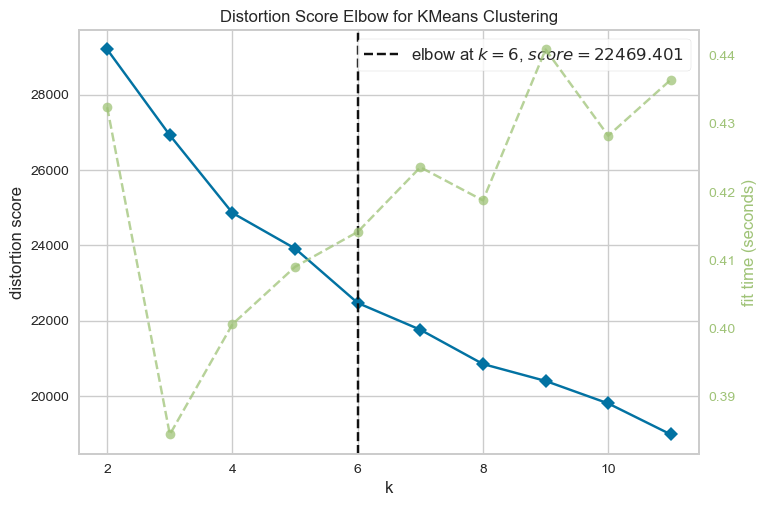

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
visualizer = KElbowVisualizer(model_cluster, k=(2, 12))
visualizer.fit(X_transform_filter)
visualizer.show()

In [17]:
model_cluster = cluster.KMeans(n_clusters=visualizer.elbow_value_)

In [18]:
model_cluster.fit(X_transform_filter)


c:\Users\Mariana Moledo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [19]:
cluster_labels = model_cluster.predict(X_transform_filter)
cluster_labels


array([1, 4, 4, ..., 0, 0, 5])

In [20]:
X_transform_filter['cluster_name'] = model_cluster.labels_
X_transform_filter


,ACAOAFIRMATIVA_AC,ACAOAFIRMATIVA_A1,ACAOAFIRMATIVA_L2,ACAOAFIRMATIVA_L4,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,TURNOATUAL_MATUTINO,ANOINGRESSO_2012,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_BRANCA,COR_NÃO DECLARADO,COR_PARDA,COR_NEGRA,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas,AREACURSO_Ciências Humanas,AREACURSO_Ciências Biológicas e da Saúde,AREACURSO_Ciências Exatas e da Terra,AREACURSO_Letras e Artes,AREACURSO_Engenharias,cluster_name
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9140,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9141,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
9142,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [21]:
# Estatísticas descritivas para cada cluster
estatisticas_clusters = X_transform_filter.groupby('cluster_name').agg(['mean', 'median', 'std', 'count'])
print(estatisticas_clusters)


             ACAOAFIRMATIVA_AC                        ACAOAFIRMATIVA_A1  \
                          mean median       std count              mean   
cluster_name                                                              
0                     0.795294    1.0  0.403645  1275          0.066667   
1                     0.781622    1.0  0.413262  1763          0.060125   
2                     0.799323    1.0  0.400677  1181          0.047417   
3                     0.764376    1.0  0.424537  1426          0.067321   
4                     0.774473    1.0  0.418058  1614          0.050805   
5                     0.792573    1.0  0.405572  1885          0.056233   

                                    ACAOAFIRMATIVA_L2                         \
             median       std count              mean median       std count   
cluster_name                                                                   
0               0.0  0.249542  1275          0.051765    0.0  0.221639  1275   
1   

In [23]:
summary_distancia = X_transform_filter.groupby(['cluster_name']).mean()
summary_distancia

,ACAOAFIRMATIVA_AC,ACAOAFIRMATIVA_A1,ACAOAFIRMATIVA_L2,ACAOAFIRMATIVA_L4,TURNOATUAL_INTEGRAL,TURNOATUAL_NOTURNO,TURNOATUAL_MATUTINO,ANOINGRESSO_2012,ANOINGRESSO_2013,ANOINGRESSO_2014,SEMESTREINGRESSO_1,SEMESTREINGRESSO_2,COR_BRANCA,COR_NÃO DECLARADO,COR_PARDA,COR_NEGRA,SEXO_M,SEXO_F,AREACURSO_Ciências Sociais Aplicadas,AREACURSO_Ciências Humanas,AREACURSO_Ciências Biológicas e da Saúde,AREACURSO_Ciências Exatas e da Terra,AREACURSO_Letras e Artes,AREACURSO_Engenharias
cluster_name,,,,,,,,,,,,,,,,,,,,,,,,
0,0.795294,0.066667,0.051765,0.054902,0.000000,0.943529,0.043137,0.146667,0.613333,0.240000,0.295686,0.704314,0.119216,0.737255,0.096471,0.044706,1.000000,0.000000,0.426667,0.277647,0.000000,0.254118,0.034510,0.000000
1,0.781622,0.060125,0.058990,0.054453,0.849121,0.000000,0.112309,0.163925,0.402723,0.433352,1.000000,0.000000,0.132161,0.732275,0.096994,0.036869,1.000000,0.000000,0.180942,0.132728,0.072604,0.294385,0.020987,0.266024
2,0.799323,0.047417,0.049111,0.055885,0.000000,1.000000,0.000000,0.287892,0.188823,0.523285,1.000000,0.000000,0.141406,0.693480,0.099915,0.061812,0.439458,0.560542,0.483489,0.201524,0.000000,0.263336,0.040644,0.000000
3,0.764376,0.067321,0.065217,0.056802,0.897616,0.000000,0.094670,0.123422,0.453717,0.422861,0.000000,1.000000,0.159187,0.693548,0.091164,0.054698,1.000000,0.000000,0.160589,0.082048,0.064516,0.404628,0.023843,0.239130
4,0.774473,0.050805,0.063817,0.058860,0.830235,0.000000,0.092317,0.154895,0.394672,0.450434,1.000000,0.000000,0.117100,0.744114,0.092937,0.041512,0.000000,1.000000,0.248451,0.197646,0.159232,0.180297,0.042131,0.135068
5,0.792573,0.056233,0.056233,0.051989,0.600531,0.282759,0.077454,0.184085,0.429178,0.386737,0.000000,1.000000,0.129443,0.718833,0.097613,0.048276,0.000000,1.000000,0.292308,0.232891,0.095491,0.211141,0.062599,0.083289


<Axes: ylabel='cluster_name'>

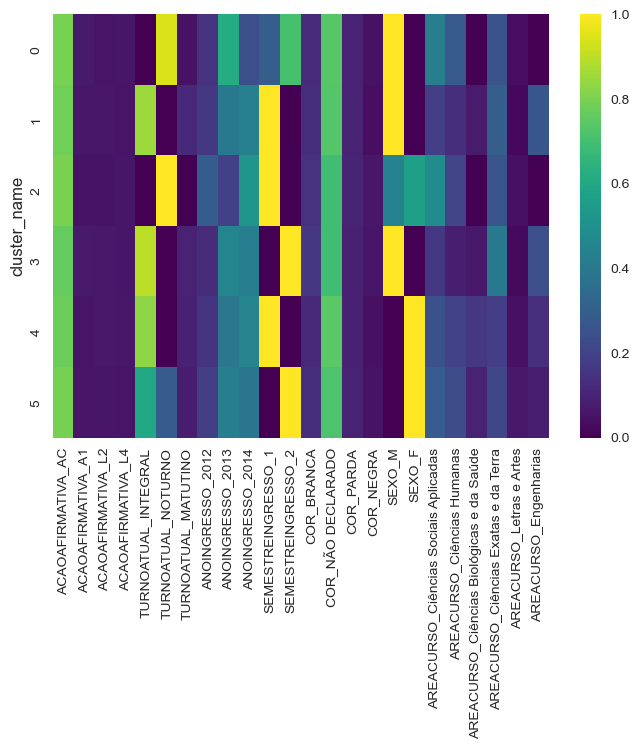

In [34]:
seaborn.heatmap(summary_distancia, cmap='viridis') 